In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
D1 = pd.read_csv("D1.data",header=None)
D2 = pd.read_csv("D2.data",header=None)
D1.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
D2.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [6]:
D1_X = D1.iloc[:, 0:3]
D1_y = D1.iloc[:, 3]
D2_X = D2.iloc[:, 3:]
D2_y = D2.iloc[:, 2]

In [8]:
train_size_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
D1_score_rf_list = []
D2_score_rf_list = []
D1_score_adb_list = []
D2_score_adb_list = []
for i in train_size_list:
    D1_X_train, D1_X_test, D1_y_train, D1_y_test = train_test_split(D1_X, D1_y, train_size=i)
    D2_X_train, D2_X_test, D2_y_train, D2_y_test = train_test_split(D2_X, D2_y, train_size=i)
    rr_rf = RandomForestRegressor(n_estimators=25, max_depth=3, bootstrap=True)
    rr_adb = AdaBoostRegressor(n_estimators=25, learning_rate=1.0, loss='linear', random_state=None)
    rr_rf.fit(D1_X_train, D1_y_train)
    rr_adb.fit(D1_X_train, D1_y_train)
    D1_score_rf = rr_rf.score(D1_X_test, D1_y_test)
    D1_score_rf_list.append(D1_score_rf)
    D1_score_adb = rr_adb.score(D1_X_test, D1_y_test)
    D1_score_adb_list.append(D1_score_adb)
    rr_rf.fit(D2_X_train, D2_y_train)
    rr_adb.fit(D2_X_train, D2_y_train)
    D2_score_rf = rr_rf.score(D2_X_test, D2_y_test)
    D2_score_rf_list.append(D2_score_rf)
    D2_score_adb = rr_adb.score(D2_X_test, D2_y_test)
    D2_score_adb_list.append(D2_score_adb)
D1_score_rf_list

[0.9461515629458566,
 0.9411802517994589,
 0.9259499610136467,
 0.9425682071147615,
 0.9404522030075607,
 0.9001080759629148]

In [9]:
D2_score_rf_list

[0.9748619277398278,
 0.9701251969910917,
 0.9863450121428087,
 0.983669089988244,
 0.9821992715919792,
 0.9888563884615315]

In [10]:
D1_score_adb_list

[0.9458536563576168,
 0.9416338423527179,
 0.941501089350317,
 0.9455531564653974,
 0.9431200237787488,
 0.9195077487922767]

In [11]:
D2_score_adb_list

[0.9817246180093951,
 0.9829780039221208,
 0.9941277940235995,
 0.9870392990015147,
 0.9935186624583089,
 0.9942374798439693]

## 性能比较

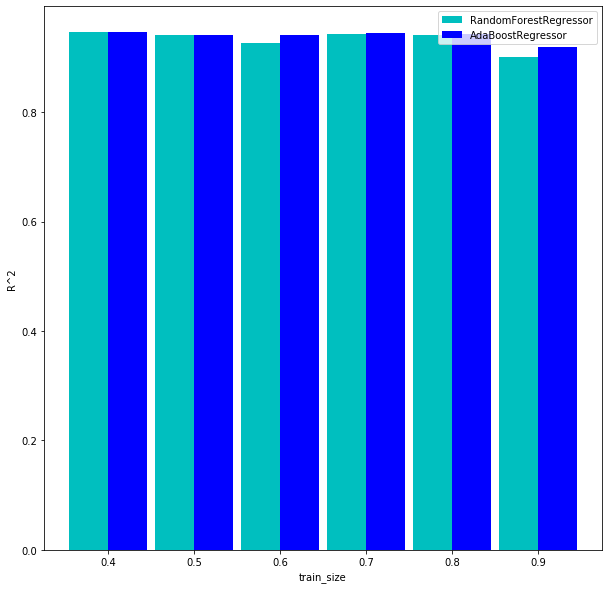

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
x = np.arange(6)
y1 = D1_score_rf_list
y2 = D1_score_adb_list

bar_width = 0.45
tick_label = ["0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]

plt.bar(x, y1, bar_width, align="center", color="c", label="RandomForestRegressor")
plt.bar(x+bar_width, y2, bar_width, align="center", color="b", label="AdaBoostRegressor")

plt.xlabel("train_size")
plt.ylabel("R^2")

plt.xticks(x+bar_width/2, tick_label)

plt.legend()
plt.savefig('./D1_regressor.svg')
plt.show()

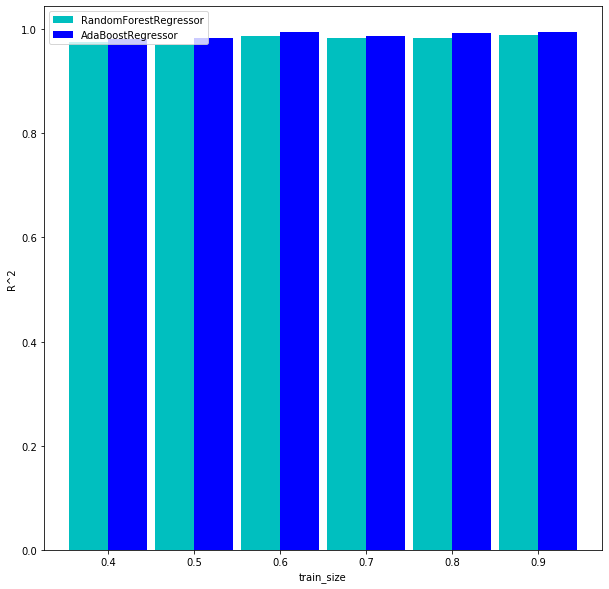

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
x = np.arange(6)
y1 = D2_score_rf_list
y2 = D2_score_adb_list

bar_width = 0.45
tick_label = ["0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]

plt.bar(x, y1, bar_width, align="center", color="c", label="RandomForestRegressor")
plt.bar(x+bar_width, y2, bar_width, align="center", color="b", label="AdaBoostRegressor")

plt.xlabel("train_size")
plt.ylabel("R^2")

plt.xticks(x+bar_width/2, tick_label)

plt.legend()
plt.savefig('./D2_regressor.svg')
plt.show()